<a href="https://colab.research.google.com/github/SushilKokare/Deep_Learning_Lab/blob/main/3_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.datasets import mnist

In [48]:
def build_logistic_model(input_dim,ouput_dim):
  model = Sequential()
  model.add(Dense(ouput_dim,input_dim=input_dim,activation='softmax'))
  return model

In [53]:
batch_size = 128
nb_classes = 10
nb_epochs = 20
input_dim = 784

In [13]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [14]:
# def PrintShape()
def ps(x):
  print(x.shape)

In [15]:
ps(x_train)
ps(y_train)
ps(x_test)
ps(y_test)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [16]:
x_train = x_train.reshape(60000,input_dim)
x_test = x_test.reshape(10000,input_dim)

In [17]:
ps(x_train)
ps(y_train)
ps(x_test)
ps(y_test)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [19]:
print(x_train.dtype)
print(x_test.dtype)


uint8
uint8


In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [22]:
print(x_train.dtype)
print(x_test.dtype)

float32
float32


In [23]:
x_train[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [24]:
x_train /= 255
x_test /= 255

In [25]:
x_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
print(x_train.shape[0],' train samples')

60000  train samples


In [29]:
print(x_test.shape[0],' test samples')

10000  test samples


In [45]:
# x = [1,2,3,4,5,9,7]
# print(type(x))
# np_utils.to_categorical(x)


In [46]:
# conversion of vector to binary class matrics
y_train = np_utils.to_categorical(y_train,nb_classes)
y_test = np_utils.to_categorical(y_test,nb_classes)

In [49]:
model = build_logistic_model(input_dim,nb_classes)

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
history = model.fit(x_train,y_train,batch_size=batch_size,
                    epochs=50,verbose=1,
                    validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 1.2936 - accuracy: 0.6896 - val_loss: 0.8205 - val_accuracy: 0.8291
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: 0.7234 - accuracy: 0.8371 - val_loss: 0.6130 - val_accuracy: 0.8622
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.5924 - accuracy: 0.8567 - val_loss: 0.5297 - val_accuracy: 0.8737
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.5295 - accuracy: 0.8670 - val_loss: 0.4833 - val_accuracy: 0.8813
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.4914 - accuracy: 0.8731 - val_loss: 0.4526 - val_accuracy: 0.8871
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4651 - accuracy: 0.8787 - val_loss: 0.4309 - val_accuracy: 0.8906
Epoch 7/50
469/469 [==============================] - 2s 3ms/step - loss: 0.4456 - accuracy: 0.8819 - val_loss: 0.4146 - val_accuracy: 0.8931
Epoch 

In [55]:
score = model.evaluate(x_test,y_test,verbose=0)

In [56]:
print('Test Loss = ',score[0])
print('Train Loss = ',score[1])

Test Loss =  0.29859060049057007
Train Loss =  0.9172999858856201


In [57]:
hist = history.history

In [58]:
import matplotlib.pyplot as plt

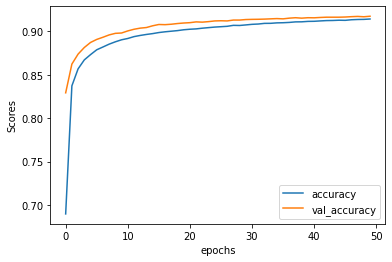

In [59]:
plt.figure()
plt.xlabel('epochs')
plt.ylabel('Scores')
for m in ['accuracy','val_accuracy']:
  x = hist[m]
  plt.plot(x,label=m)
plt.legend()